In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
bls = pd.read_csv('/project/high_tech_ind/WFH/WFH/data/processed/bls/oews/oews_all_2023.csv', low_memory=False)

ors = pd.read_excel('/project/high_tech_ind/WFH/WFH/data/raw/ors/final_second_wave_2023.xlsx', sheet_name='ORS 2023 dataset',
                    usecols=["ESTIMATE TEXT", "ESTIMATE CODE", "SOC 2018 CODE",	"REQUIREMENT", "CATEGORY", "DATATYPE",	"ESTIMATE"], 
                    dtype={"SOC 2018 CODE" : str})
ors.rename(columns={"SOC 2018 CODE" : "OCC_CODE"}, inplace=True)
ors["OCC_CODE"] = ors.OCC_CODE.apply(lambda x: x[:2] + "-" + x[2:])
ors_telework = ors[ors['CATEGORY'] == 'Telework'].copy()
ors_telework = ors_telework[ors_telework["ESTIMATE CODE"] == 1205]
ors_telework.drop(columns=['CATEGORY', "REQUIREMENT", "ESTIMATE TEXT", "DATATYPE", "ESTIMATE CODE"], inplace=True)
ors_telework.rename(columns={"ESTIMATE" : "WFH"}, inplace=True)
ors_telework["WFH"] = ors_telework["WFH"].str.replace("<0.5", "0")
ors_telework["WFH"] = pd.to_numeric(ors_telework['WFH'], errors='coerce') / 100
ors_telework["WFH"].dropna(inplace=True)

In [7]:
bls.OWN_CODE.value_counts(normalize=True)

OWN_CODE
1235    0.573950
5       0.348988
235     0.020480
2       0.015530
3       0.014700
57      0.008925
123     0.008560
1       0.004544
58      0.002323
59      0.002001
Name: proportion, dtype: float64

In [6]:
bls.loc[bls.AREA_TYPE == 4]

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
215177,11500,"Anniston-Oxford-Jacksonville, AL",4,AL,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.2,26.87,36.83,21860,28270,37850,55890,76610,NaN,NaN
215178,12220,"Auburn-Opelika, AL",4,AL,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.18,28.46,42.1,22060,28430,37820,59190,87570,NaN,NaN
215179,13820,"Birmingham-Hoover, AL",4,AL,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,21.55,31.18,48.07,23600,31060,44830,64850,99980,NaN,NaN
215180,19300,"Daphne-Fairhope-Foley, AL",4,AL,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,17.32,25.06,36.75,21380,27420,36030,52130,76430,NaN,NaN
215181,19460,"Decatur, AL",4,AL,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,20.27,30.34,46.23,23020,30330,42160,63100,96160,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364763,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",4,DC,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,24.13,30.55,33.44,32670,36180,50190,63540,69560,NaN,NaN
364764,49700,"Yuba City, CA",4,CA,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,16.58,17.76,31.91,32240,33180,34490,36940,66370,NaN,NaN
364765,71650,"Boston-Cambridge-Nashua, MA-NH",4,MA,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,20.65,25.6,32.51,38830,41190,42950,53240,67620,NaN,NaN
364766,73450,"Hartford-West Hartford-East Hartford, CT",4,CT,000000,Cross-industry,cross-industry,1235,53-7199,"Material Moving Workers, All Other",...,22.3,28.74,29.81,41720,41720,46380,59770,62000,NaN,NaN


In [139]:
bls_national_no_ind = bls[
    (bls.AREA == 99 ) &
    (bls.NAICS == "000000") 
]
bls_national_no_ind = bls_national_no_ind[['OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'H_MEAN', 'A_MEAN']]
bls_national_no_ind['TOT_EMP'] = pd.to_numeric(bls_national_no_ind['TOT_EMP'], errors='coerce')
bls_national_no_ind['H_MEAN'] = pd.to_numeric(bls_national_no_ind['H_MEAN'], errors='coerce')
bls_national_no_ind['A_MEAN'] = pd.to_numeric(bls_national_no_ind['A_MEAN'], errors='coerce')
bls_national_no_ind['TOT_EMP_PERCENT'] = np.log( bls_national_no_ind['TOT_EMP'] / bls_national_no_ind[bls_national_no_ind['OCC_CODE'] == '00-0000']['TOT_EMP'].values[0] + 1 )


bls_national_no_ind_wfhshare = bls_national_no_ind.merge(ors_telework, on='OCC_CODE', how='inner')

In [78]:
bls_national_no_ind_wfhshare

,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,H_MEAN,A_MEAN,TOT_EMP_PERCENT,WFH
0,00-0000,All Occupations,total,151853870,31.48,65470.0,1.000000,0.114
1,11-0000,Management Occupations,major,10495770,66.23,137750.0,0.069118,0.330
2,11-1011,Chief Executives,detailed,211230,124.47,258900.0,0.001391,0.417
3,11-1021,General and Operations Managers,detailed,3507810,62.18,129330.0,0.023100,0.276
4,11-2011,Advertising and Promotions Managers,detailed,20630,73.38,152620.0,0.000136,0.393
...,...,...,...,...,...,...,...,...
440,53-7062,"Laborers and Freight, Stock, and Material Move...",detailed,3008300,19.12,39760.0,0.019810,0.000
441,53-7063,Machine Feeders and Offbearers,detailed,44500,19.71,41000.0,0.000293,0.000
442,53-7064,"Packers and Packagers, Hand",detailed,645210,17.05,35450.0,0.004249,0.000
443,53-7065,Stockers and Order Fillers,detailed,2872680,18.27,37990.0,0.018917,0.000


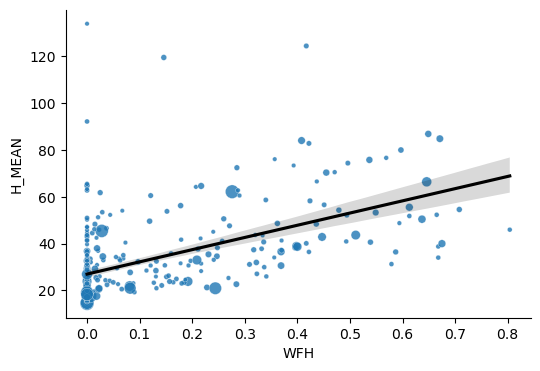

In [153]:
fig, ax = plt.subplots(1, 1 , figsize=(6, 4))
sns.scatterplot(
                data=bls_national_no_ind_wfhshare[bls_national_no_ind_wfhshare['O_GROUP'] == 'detailed'],
                x='WFH', y='H_MEAN', alpha = 0.8,
                ax=ax , size='TOT_EMP_PERCENT', sizes=(10, 100))
sns.regplot( data=bls_national_no_ind_wfhshare[bls_national_no_ind_wfhshare['O_GROUP'] == 'detailed'],
                x='WFH', y='H_MEAN', scatter=False, ax=ax, color='black')
sns.despine()
ax.legend_.remove()
plt.show()

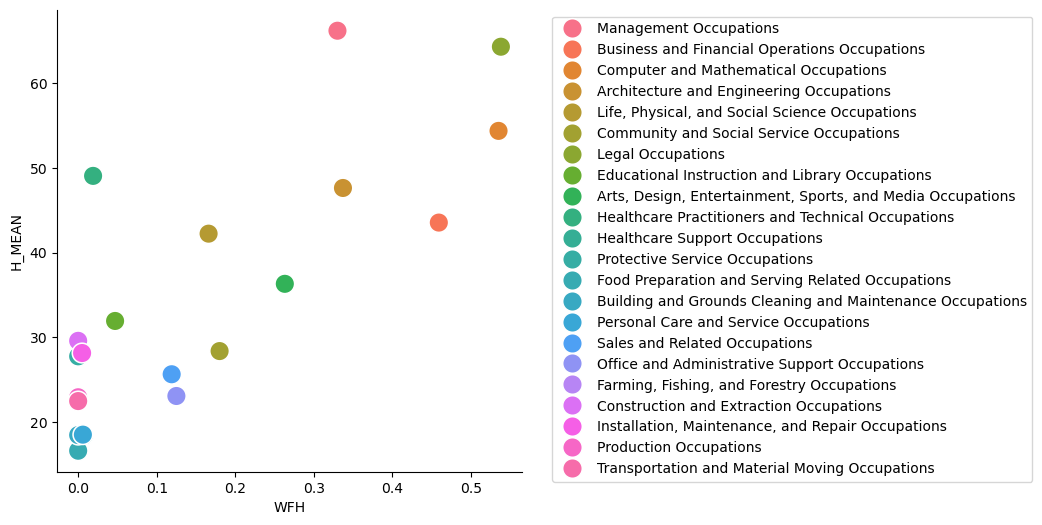

In [134]:
fig, ax = plt.subplots(1, 1 , figsize=(6, 6))
sns.scatterplot(x='WFH', y='H_MEAN', data=bls_national_no_ind_wfhshare[bls_national_no_ind_wfhshare.O_GROUP == "major"], ax=ax, hue='OCC_TITLE', s = 200)
sns.despine()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [116]:
bls_national_3ind = bls[
    (bls.AREA == 99 ) &
    (bls.I_GROUP == 'sector') 
]

bls_national_3ind = bls_national_3ind[['NAICS_TITLE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'H_MEAN', 'A_MEAN']]

bls_national_3ind['TOT_EMP'] = pd.to_numeric(bls_national_3ind['TOT_EMP'], errors='coerce')
bls_national_3ind['H_MEAN'] = pd.to_numeric(bls_national_3ind['H_MEAN'], errors='coerce')
bls_national_3ind['A_MEAN'] = pd.to_numeric(bls_national_3ind['A_MEAN'], errors='coerce')
# bls_national_3ind['TOT_EMP_PERCENT'] = bls_national_3ind['TOT_EMP'] / bls_national_3ind[bls_national_3ind['OCC_CODE'] == '00-0000']['TOT_EMP'].values[0]


bls_national_3ind_wfhshare = bls_national_3ind.merge(ors_telework, on='OCC_CODE', how='inner')

bls_national_3ind_wfhshare

,NAICS_TITLE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,H_MEAN,A_MEAN,WFH
0,"Agriculture, Forestry, Fishing and Hunting",00-0000,All Occupations,total,413580.0,20.68,43010.0,0.114
1,"Agriculture, Forestry, Fishing and Hunting",11-0000,Management Occupations,major,12040.0,52.69,109590.0,0.330
2,"Agriculture, Forestry, Fishing and Hunting",11-1011,Chief Executives,detailed,130.0,109.02,226760.0,0.417
3,"Agriculture, Forestry, Fishing and Hunting",11-1021,General and Operations Managers,detailed,6020.0,51.16,106410.0,0.276
4,"Agriculture, Forestry, Fishing and Hunting",11-2021,Marketing Managers,detailed,60.0,64.34,133820.0,0.597
...,...,...,...,...,...,...,...,...
5636,Transportation and Warehousing,53-7062,"Laborers and Freight, Stock, and Material Move...",detailed,1037640.0,20.23,42080.0,0.000
5637,Transportation and Warehousing,53-7063,Machine Feeders and Offbearers,detailed,6180.0,23.61,49100.0,0.000
5638,Transportation and Warehousing,53-7064,"Packers and Packagers, Hand",detailed,97760.0,20.19,42000.0,0.000
5639,Transportation and Warehousing,53-7065,Stockers and Order Fillers,detailed,467320.0,21.18,44050.0,0.000


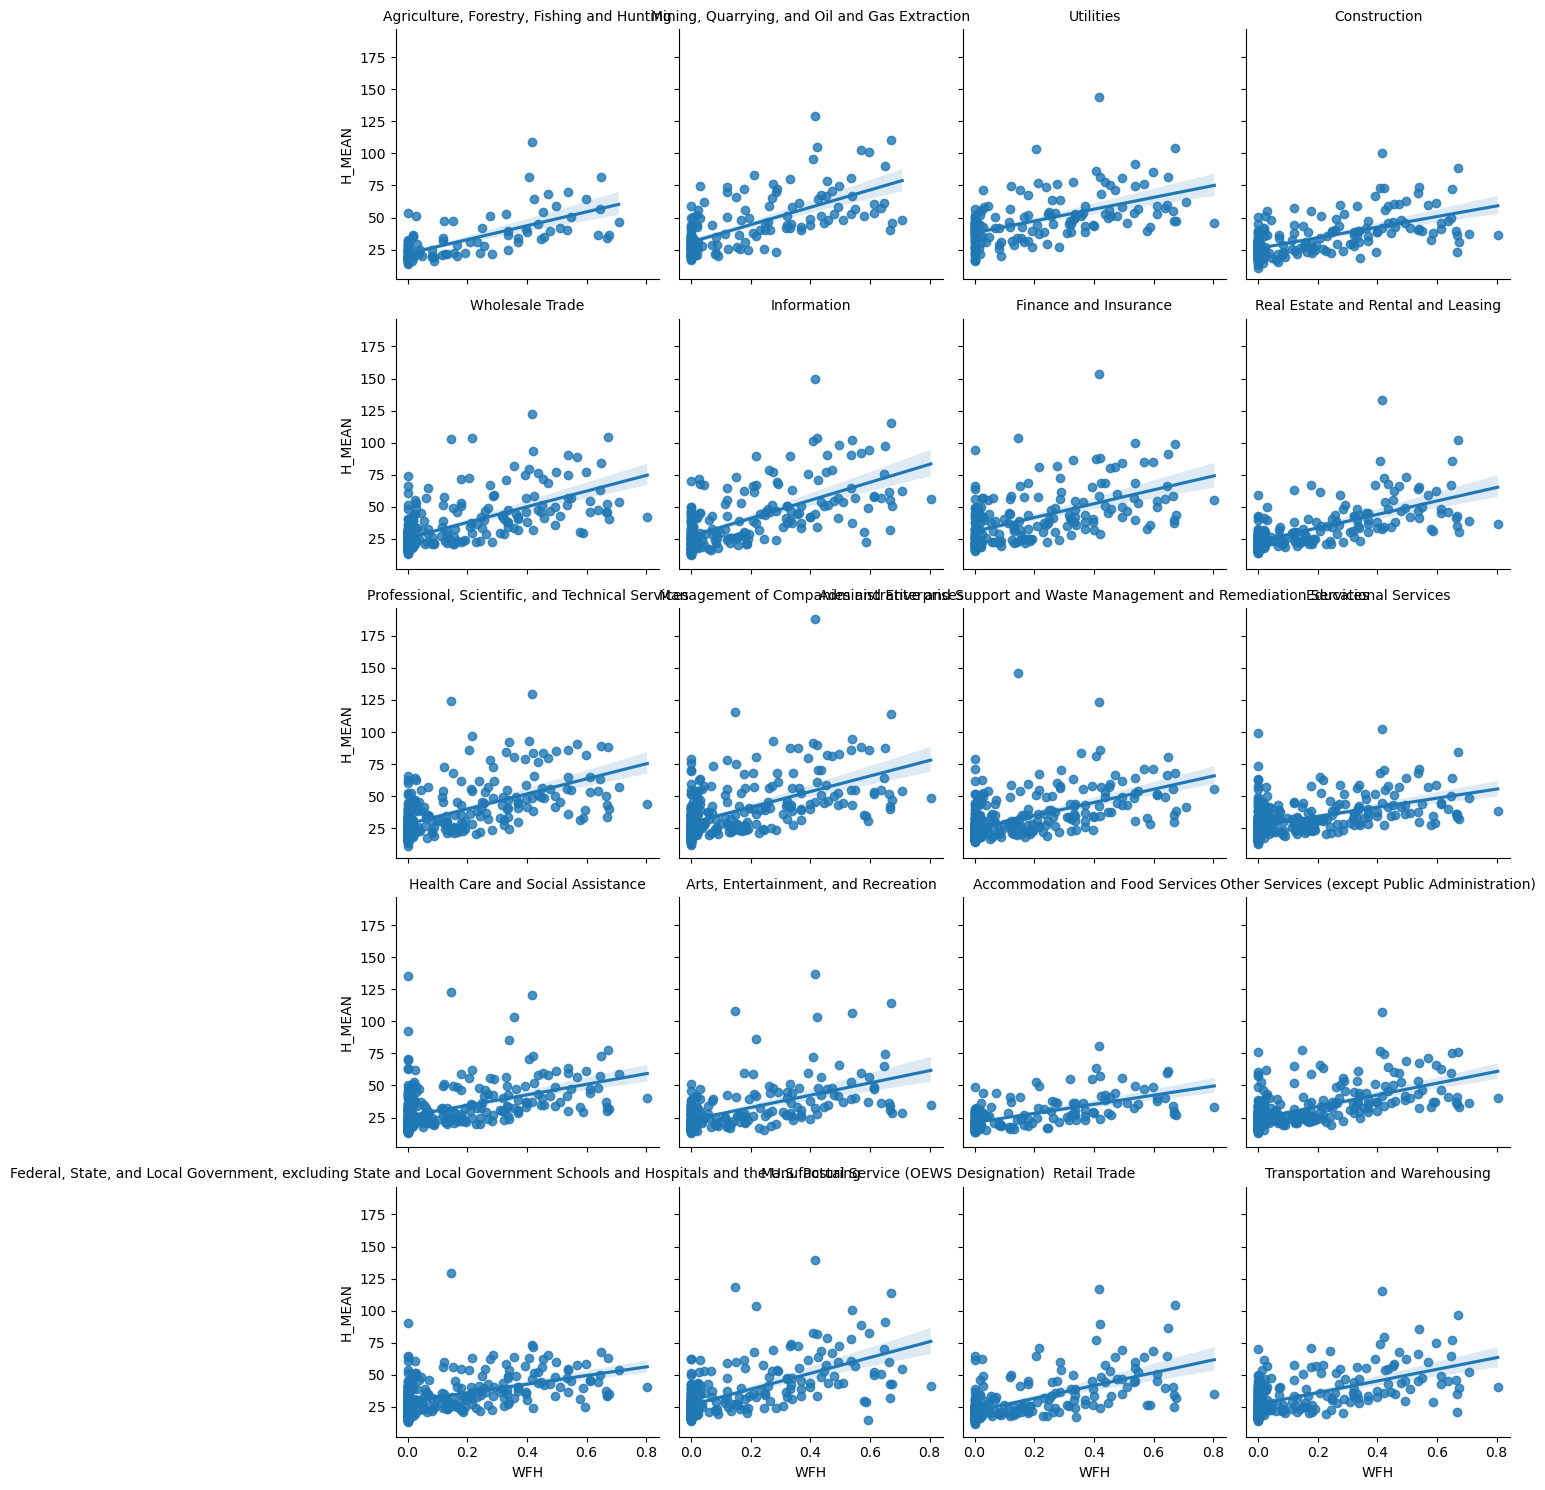

In [125]:
fg = sns.FacetGrid(bls_national_3ind_wfhshare, col='NAICS_TITLE', col_wrap=4)
fg.set_titles("{col_name}")
fg.map(sns.regplot, 'WFH', 'H_MEAN')

In [8]:
acs = pd.read_csv('/project/high_tech_ind/WFH/WFH/data/processed/acs/acs_136_processed.csv.gz', low_memory=False, compression='gzip')

acs

,YEAR,PERWT,AGE,RACE,RACED,EDUC,EDUCD,CLASSWKR,CLASSWKRD,OCCSOC,...,OCCSOC_detailed,OCCSOC_broad,OCCSOC_minor,state_puma,cbsa20,TELEWORKABLE_OCCSOC,TELEWORKABLE_OCCSOC_detailed,TELEWORKABLE_OCCSOC_broad,TELEWORKABLE_OCCSOC_minor,WFH
0,2013,51.0,55,2,200,8,81,2,22,41-1011,...,41-1011,41-1010,41-1000,01-02500,45980.0,0.0,0.0,0.5,0.500000,False
1,2013,449.0,63,2,200,10,101,2,28,25-2020,...,NaN,25-2020,25-2000,01-01700,33860.0,NaN,NaN,1.0,1.000000,False
2,2013,46.0,59,1,100,6,63,2,22,43-5021,...,43-5021,43-5020,43-5000,01-00700,23460.0,1.0,1.0,1.0,0.272727,False
3,2013,33.0,56,1,100,6,65,2,22,23-2011,...,23-2011,23-2010,23-2000,01-00700,23460.0,1.0,1.0,1.0,1.000000,False
4,2013,78.0,52,2,200,7,71,2,28,41-2010,...,NaN,41-2010,41-2000,01-02400,21460.0,NaN,NaN,0.0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777506,2023,61.0,58,1,100,6,63,2,28,37-2010,...,NaN,37-2010,37-2000,56-00400,16220.0,NaN,NaN,0.0,0.000000,False
9777507,2023,63.0,26,1,100,6,63,2,28,37-2010,...,NaN,37-2010,37-2000,56-00400,16220.0,NaN,NaN,0.0,0.000000,False
9777508,2023,125.0,70,1,100,6,65,2,22,31-1122,...,31-1122,31-1120,31-1100,56-00500,40540.0,NaN,NaN,NaN,NaN,False
9777509,2023,78.0,53,1,100,11,114,2,28,25-2030,...,NaN,25-2030,25-2000,56-00300,16940.0,NaN,NaN,1.0,1.000000,False


In [9]:
acs.columns

Index(['YEAR', 'PERWT', 'AGE', 'RACE', 'RACED', 'EDUC', 'EDUCD', 'CLASSWKR',
       'CLASSWKRD', 'OCCSOC', 'INDNAICS', 'INCTOT', 'TRANWORK', 'TRANTIME',
       'WAGE', 'OCCSOC_group', 'OCCSOC_detailed', 'OCCSOC_broad',
       'OCCSOC_minor', 'state_puma', 'cbsa20', 'TELEWORKABLE_OCCSOC',
       'TELEWORKABLE_OCCSOC_detailed', 'TELEWORKABLE_OCCSOC_broad',
       'TELEWORKABLE_OCCSOC_minor', 'WFH'],
      dtype='object')

In [11]:
acs_sample = acs[['YEAR', 'PERWT', 'AGE', 'RACE', 'RACED', 'EDUC', 'WAGE', "INDNAICS",
    'EDUCD','CLASSWKRD', 'OCCSOC_detailed', "OCCSOC_minor",
    'OCCSOC_broad', 'cbsa20', 'WFH']].sample(int(15 * acs.shape[0] / 100))

In [12]:
acs_sample.to_csv('/project/high_tech_ind/WFH/WFH/data/processed/acs/acs_136_sample.csv.gz', index=False, compression='gzip')

In [15]:
acs["INDNAICS"].nunique()

316